In [2]:
import warnings
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from lib import personalised_graphics
from matplotlib.colors import LinearSegmentedColormap

# resolver futuras advertencias
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._core")
warnings.filterwarnings("ignore", category=FutureWarning, module="geopandas._core")

# Importar y transformar sig data
sig_provincias = gpd.read_file("data/sig/provincia.shp")

sig_provincias["nam"] = sig_provincias["nam"].str.replace("Ciudad Autónoma de Buenos Aires", "Capital Federal")
sig_provincias["nam"] = sig_provincias["nam"].str.replace("Tierra del Fuego, Antártida e Islas del Atlántico Sur", "Tierra Del Fuego")
sig_provincias["nam"] = sig_provincias["nam"].str.replace("Santiago del Estero", "Santiago Del Estero")
sig_provincias.drop(columns=["gid", "entidad", "fna", "gna", "in1", "fdc", "sag"], inplace=True)
sig_provincias.rename(columns={"nam": "Provincia"}, inplace=True)
sig_localidades = gpd.read_file("data/sig/localidad_bahra.shp")
sig_localidades.rename(columns={"nom_agl": "Localidad"}, inplace=True)

# importar informacion nacional
velocidad_por_año = pd.read_csv("data/unprocessed/historico_velocidad_internet.csv")
accesos_por_tecnologia = pd.read_csv("data/unprocessed/Internet_Accesos-por-tecnologia.csv")
accesos_por_velocidad = pd.read_csv("data/unprocessed/Internet_Accesos-por-velocidad.csv")
banda_ancha_fija = pd.read_csv("data/unprocessed/Internet_BAF.csv")
ingresos = pd.read_csv("data/unprocessed/Internet_Ingresos.csv")
penetracion = pd.read_csv("data/unprocessed/Internet_Penetracion (1).csv")

# importar informacion provincial
accesos_prov_por_tecnologia = pd.read_csv("data/unprocessed/Internet_Accesos-por-tecnologia (1).csv")
accesos_prov_por_velocidad = pd.read_csv("data/unprocessed/AccesosaInternetfijoporvelocidadbajadayprovincia_2791741698918578304.csv")
banda_ancha_fija_prov = pd.read_csv("data/unprocessed/Internet_BAF (1).csv")
penetracion_prov = pd.read_csv("data/unprocessed/Internet_Penetracion.csv")

# importar informacion local
accesos_loc_por_tecnologia = pd.read_csv("data/accesos_loc_por_tecnologia.csv")

accesos_loc_por_velocidad = pd.read_csv("data/unprocessed/AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171698918583902.csv")
localidades_con_conectividad = pd.read_csv("data/unprocessed/Listadodelocalidadesconconectividadainternet_2750221698918588798.csv")

Cannot find header.dxf (GDAL_DATA is not defined)


In [3]:
# Aplicar transformaciones
accesos_prov_por_tecnologia["Año"].replace("2019 *", "2019", inplace=True)
accesos_prov_por_tecnologia["Trimestre"].replace("1 *", "1", inplace=True)
accesos_prov_por_tecnologia["Trimestre"].replace("2 *", "2", inplace=True)
accesos_prov_por_tecnologia["Trimestre"].replace("3 *", "3", inplace=True)
accesos_prov_por_tecnologia.drop(labels=864, inplace=True)
accesos_prov_por_tecnologia["Año"] = accesos_prov_por_tecnologia["Año"].astype(int)

accesos_prov_por_tecnologia["Año"] = accesos_prov_por_tecnologia["Año"].astype(int)
accesos_prov_por_tecnologia["Trimestre"] = accesos_prov_por_tecnologia["Trimestre"].astype(int)

In [4]:
accesos_loc_por_tecnologia.rename(columns={"CABLEMODEM": "Cablemodem"}, inplace=True)
accesos_loc_por_tecnologia.rename(columns={"FIBRA OPTICA": "Fibra óptica"}, inplace=True)
accesos_loc_por_tecnologia.rename(columns={"WIRELESS": "Wireless"}, inplace=True)
accesos_loc_por_tecnologia.rename(columns={"OTROS": "Otros"}, inplace=True)
accesos_loc_por_tecnologia

,Provincia,Partido,Localidad,Link Indec,ADSL,Cablemodem,Fibra óptica,SATELITAL,WIMAX,Wireless,Otros,DIAL UP,Total general
0,CATAMARCA,Ambato,El Bolsón,10007030,0.0,0.00,0.0,2,0,0.0,0.0,0.0,2.00
1,CATAMARCA,Ambato,El Rodeo,10007040,0.0,0.00,0.0,1,0,152.0,0.0,0.0,153.00
2,CATAMARCA,Ambato,La Puerta,10007060,0.0,0.00,0.0,5,0,0.0,0.0,0.0,5.00
3,CATAMARCA,Ambato,Las Chacritas,10007070,0.0,0.00,0.0,1,0,0.0,0.0,0.0,1.00
4,CATAMARCA,Ambato,Los Talas,10007100,0.0,0.00,0.0,0,0,66.0,0.0,0.0,66.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,BUENOS AIRES,San Isidro,San Isidro,6756010,984.0,20.89,683.0,1,0,1.0,16.0,3.0,22.58
3133,ENTRE RIOS,Colón,San José,30008090,988.0,0.00,0.0,0,0,380.0,700.0,0.0,2.07
3134,SANTA FE,San Cristóbal,San Guillermo,82091230,990.0,1.50,47.0,0,0,195.0,0.0,0.0,2.73
3135,ENTRE RIOS,Paraná,Crespo,30084070,991.0,6.03,301.0,0,0,94.0,0.0,0.0,7.42


#### NACIONAL

##### PROVINCIAL

74780.3133198789


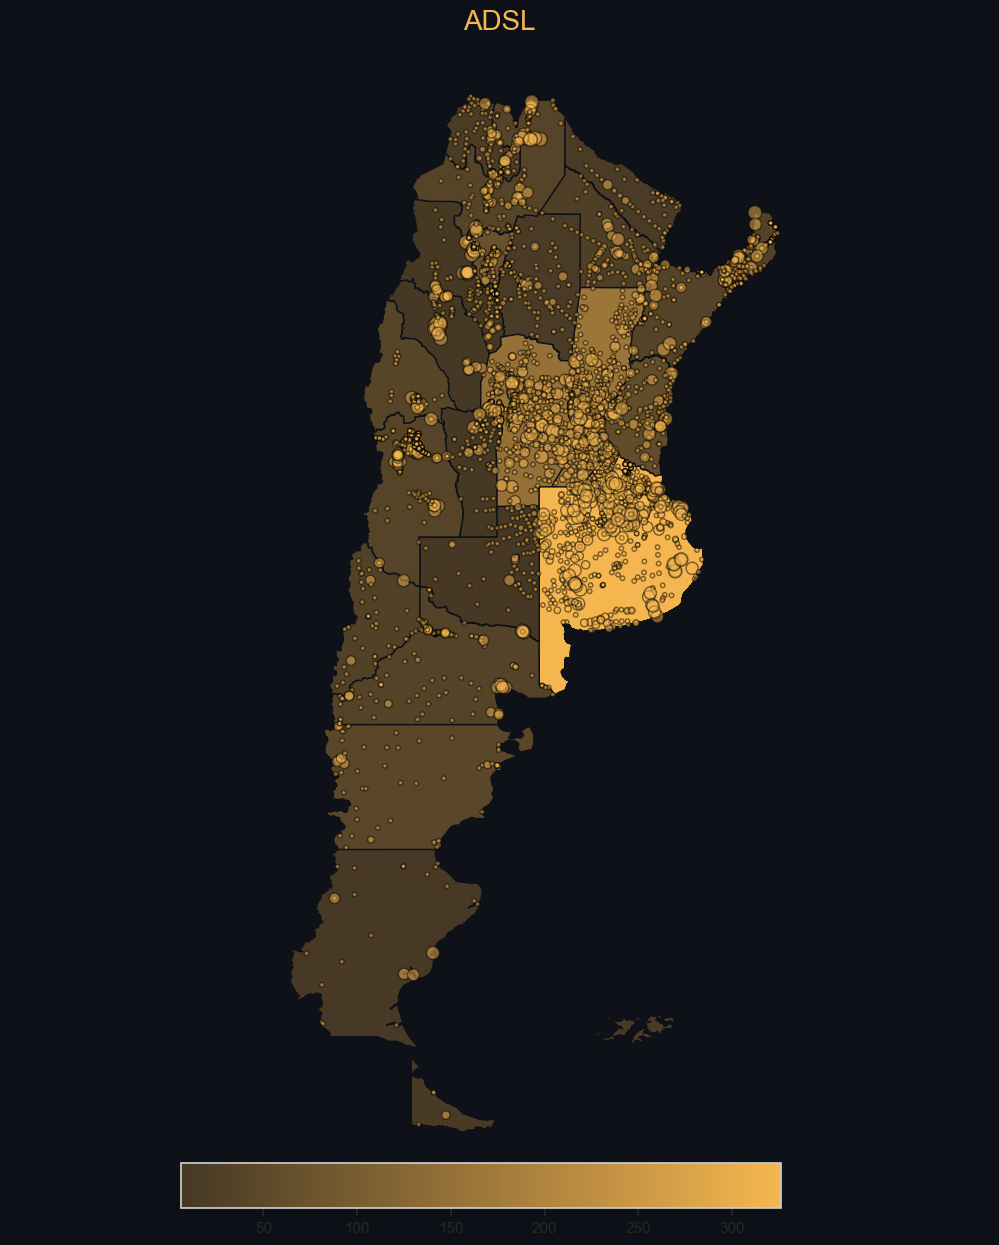

51950.868629441626


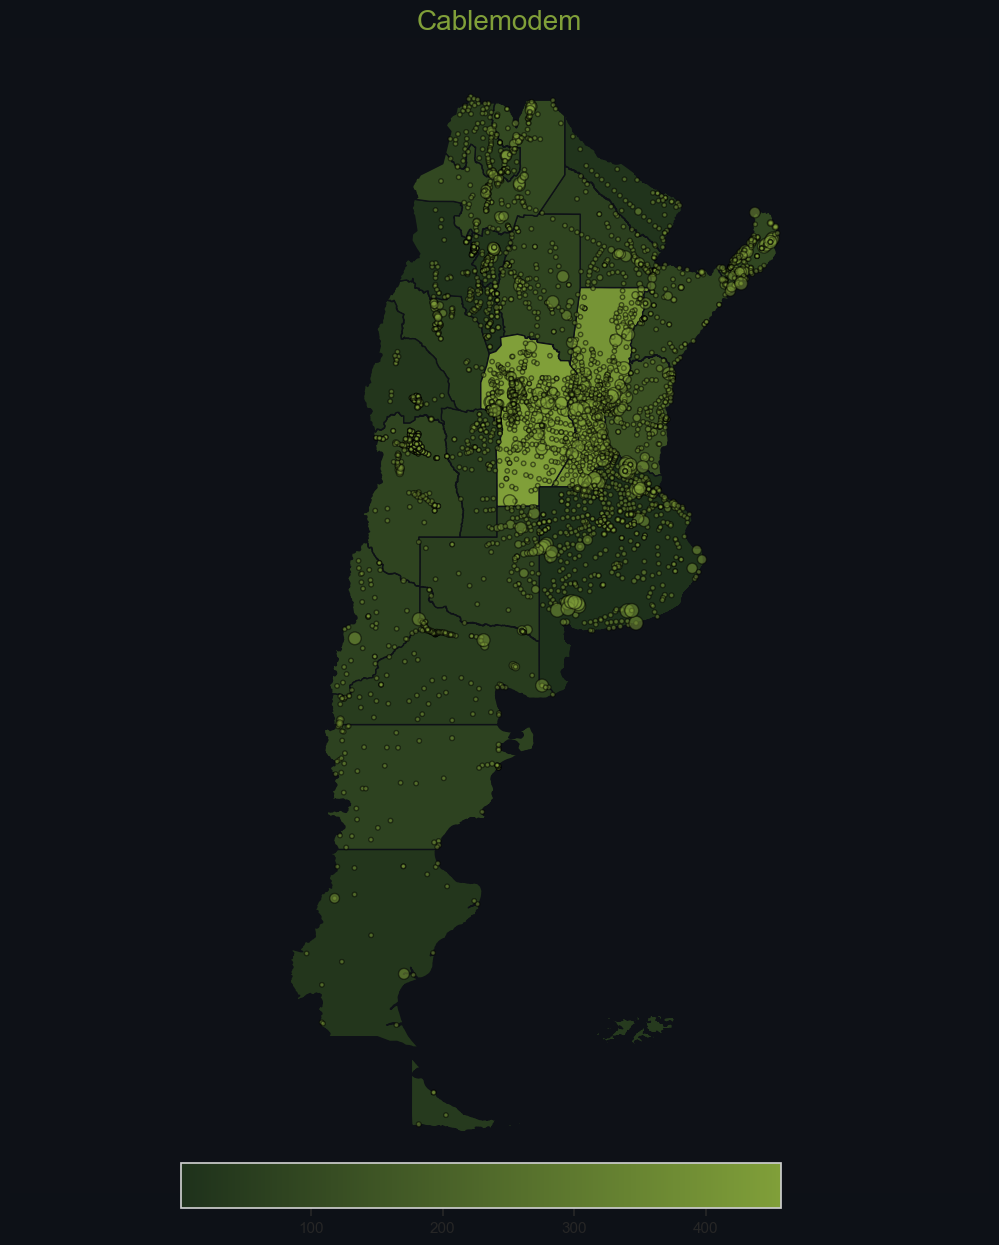

61362.496618852456


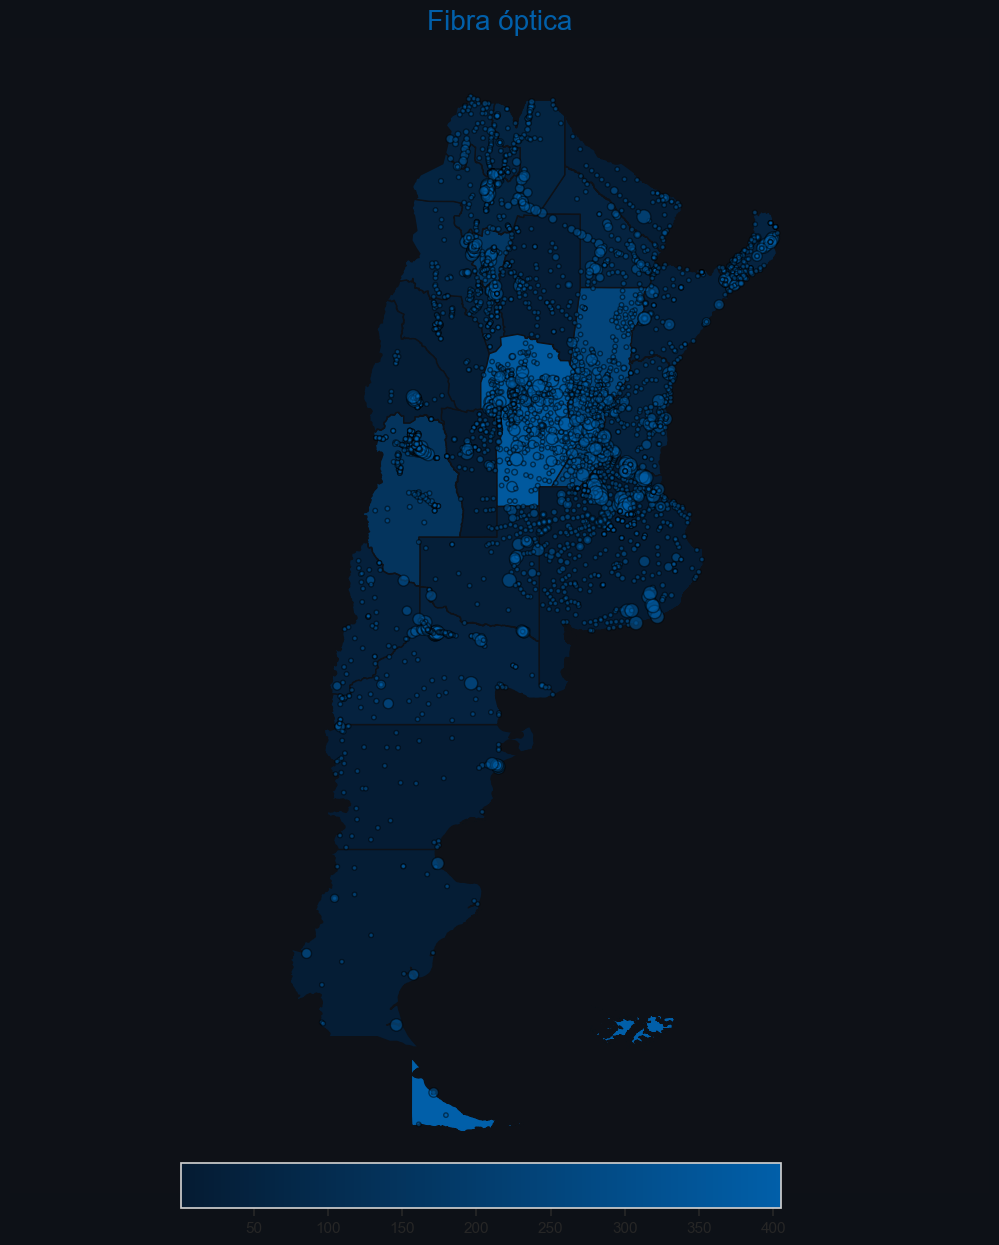

84731.06756756757


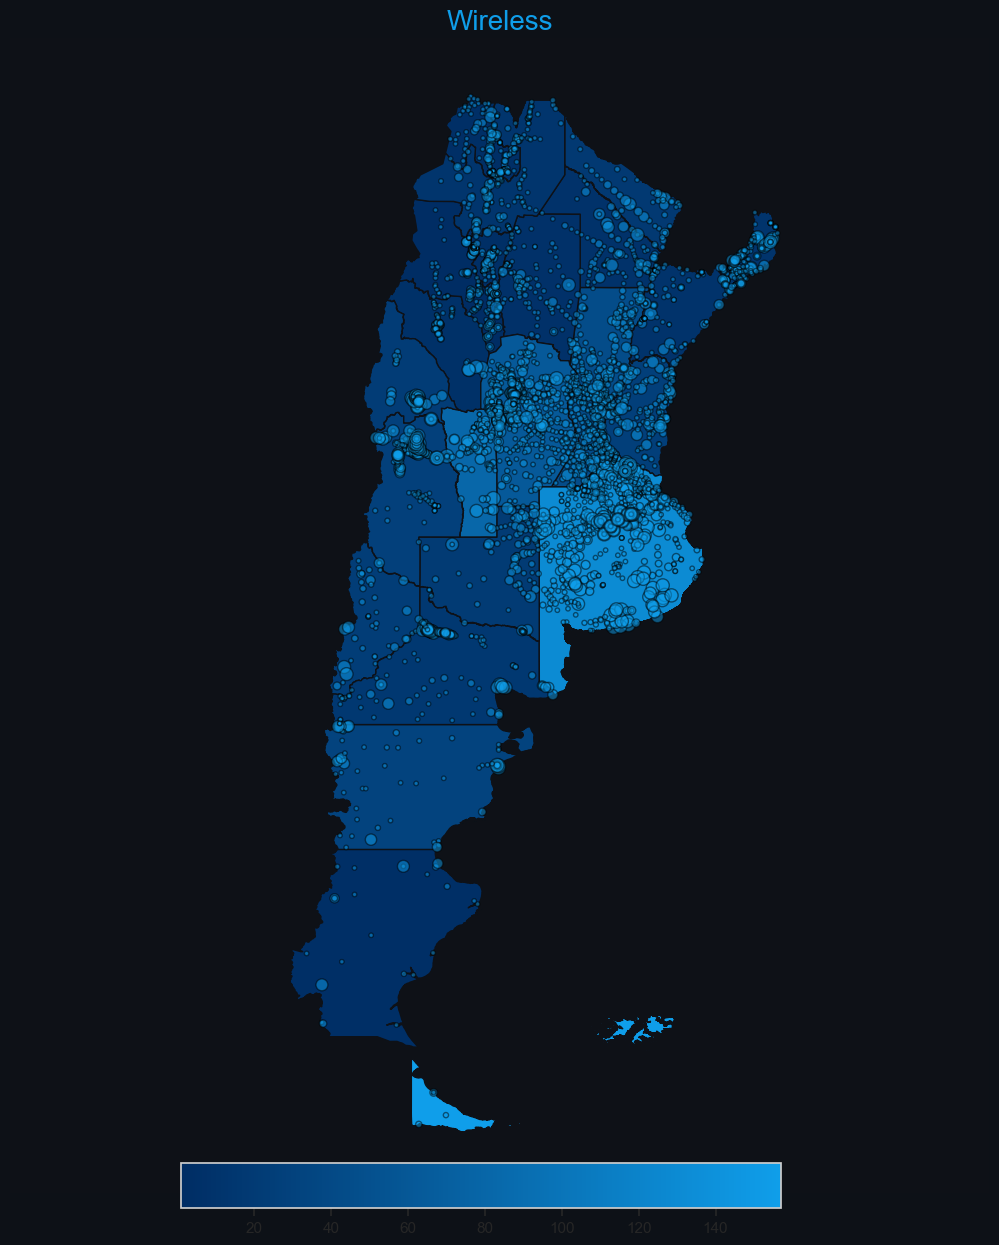

49026.77092783505


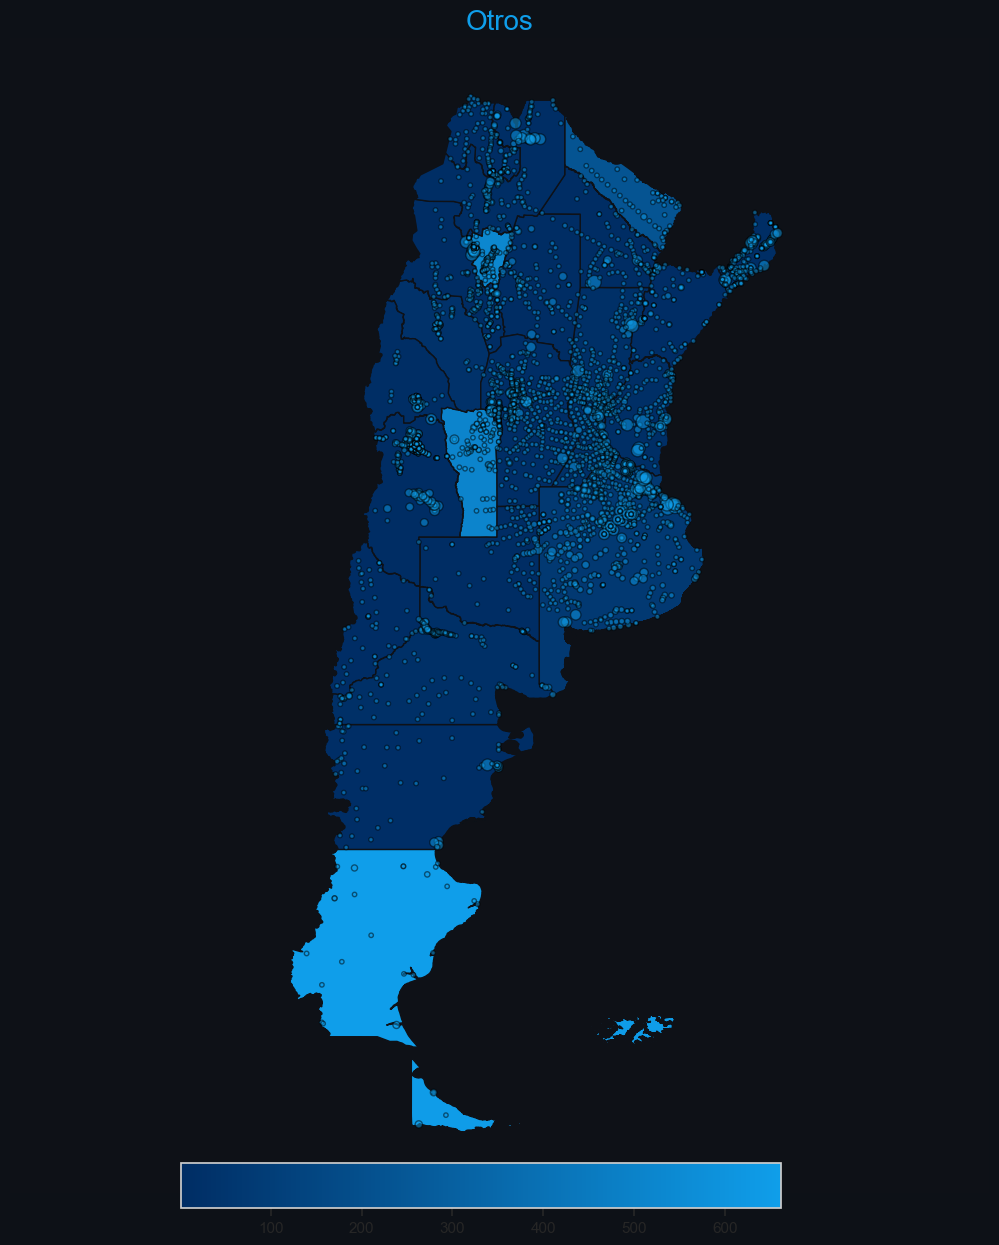

In [6]:
# 
def map(prov_data, loc_data, technology, max_color, min_color):

    prov_data = prov_data[(prov_data["Año"] == 2022) & (prov_data["Trimestre"] == 4)]
    prov_data = sig_provincias.merge(prov_data[["Provincia", technology]], on="Provincia")

    loc_data = sig_localidades.merge(loc_data[["Localidad", technology]])

    cmap = LinearSegmentedColormap.from_list('custom_colormap', [max_color, min_color], N=256)
    vmin = prov_data[technology].min()
    vmax = prov_data[technology].max()

    fig, ax = plt.subplots(figsize=(15, 15))

    prov_data.plot(column=technology, legend=False, ax=ax, edgecolor='#0E1117', linewidth=1, cmap=cmap, vmin=vmin, vmax=vmax)
    
    loc_data[f"scaled_{technology}"] = (loc_data[technology] - loc_data[technology].min()) / (loc_data[technology].max() - loc_data[technology].min()) * (100 - 10) + 10
    loc_data.plot(ax=ax, color=min_color, edgecolor="black", alpha=0.5, markersize=loc_data[f"scaled_{technology}"])
    print(loc_data[f"scaled_{technology}"].sum())

    plt.gcf().set_facecolor("#0D1117") # Background
    plt.gca().set_facecolor("#0D1117") # Background

    # Title configuration
    plt.title(f"{technology}", fontsize=20, color=min_color, loc='center')

    # Map configuration
    ax.set_xlim([-85, -45])
    ax.set_ylim([-57, -20])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_facecolor('#0E1117')

    # References configuration
    cax = plt.axes([0.3, 0.1, 0.4, 0.03])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')

    plt.show()


map(accesos_prov_por_tecnologia, accesos_loc_por_tecnologia, "ADSL", '#453824', '#F5B64F')
map(accesos_prov_por_tecnologia, accesos_loc_por_tecnologia, "Cablemodem", '#1E311B', '#809F39')
map(accesos_prov_por_tecnologia, accesos_loc_por_tecnologia, "Fibra óptica", '#051B32', '#015FA9')
map(accesos_prov_por_tecnologia, accesos_loc_por_tecnologia, "Wireless", '#002D64', '#0F9EEA')
map(accesos_prov_por_tecnologia, accesos_loc_por_tecnologia, "Otros", '#002D64', '#0F9EEA')

In [ ]:
# Exportar
velocidad_por_año.to_csv("data/velocidad_nac_por_año.csv")
accesos_por_tecnologia.to_csv("data/accesos_nac_por_tecnologia.csv")
accesos_por_velocidad.to_csv("data/accesos_nac_por_velocidad.csv")
ingresos.to_csv("data/ingresos_nac.csv")
penetracion.to_csv("data/penetracion_nac.csv")

In [ ]:
accesos_prov_por_tecnologia.to_csv("data/accesos_prov_por_tecnologia.csv")
accesos_prov_por_velocidad.to_csv("data/accesos_prov_por_velocidad.csv")
banda_ancha_fija_prov.to_csv("data/banda_ancha_fija_prov.csv")
penetracion_prov.to_csv("data/penetracion_prov.csv")

In [94]:
accesos_prov_por_tecnologia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0
...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,19.0,100.0,381.0,4.0,3.0,27.0
860,2014,1,Santa Fe,323.0,174.0,3.0,6.0,644.0,507.0
861,2014,1,Santiago Del Estero,33.0,4.0,19.0,915.0,34.0,37.0
862,2014,1,Tierra Del Fuego,22.0,3.0,648.0,1.0,3.0,28.0


In [91]:
accesos_prov_por_velocidad

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
0,2022.0,4.0,Buenos Aires,97.634,18,- 0,- 0,28.724,192,4.611,...,- 0,- 0,14,- 0,- 0,- 0,5.655,- 0,90.796,- 0
1,2022.0,4.0,Capital Federal,106.772,31,- 0,- 0,451.000,34,1.307,...,- 0,- 0,- 0,1,- 0,- 0,15,- 0,28.406,- 0
2,2022.0,4.0,Catamarca,2.280,- 0,- 0,- 0,34.000,37,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
3,2022.0,4.0,Chaco,3.909,- 0,225,111,234.000,2,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
4,2022.0,4.0,Chubut,20.026,8,- 0,- 0,69.000,32,836,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,2017.0,4.0,Santa Fe,14.119,- 0,- 0,- 0,3.109,- 0,7.637,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
501,2017.0,4.0,Santiago Del Estero,- 0,- 0,- 0,- 0,41.000,- 0,909,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
502,2017.0,4.0,Tierra Del Fuego,- 0,- 0,- 0,- 0,6.000,- 0,282,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
503,2017.0,4.0,Tucumán,- 0,- 0,- 0,- 0,105.000,- 0,1,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0


In [92]:
banda_ancha_fija_prov

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169
...,...,...,...,...,...,...
859,2014,1,Santa Cruz,26,460.0,27
860,2014,1,Santa Fe,506,612.0,507
861,2014,1,Santiago Del Estero,37,9.0,37
862,2014,1,Tierra Del Fuego,27,766.0,28


In [93]:
penetracion_prov

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN
...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,"28,94",NaN,NaN,NaN
860,2014,1,Santa Fe,"47,85",NaN,NaN,NaN
861,2014,1,Santiago Del Estero,"16,31",NaN,NaN,NaN
862,2014,1,Tierra Del Fuego,"63,97",NaN,NaN,NaN


##### LOCAL

In [210]:
localidades_con_conectividad["ADSL"].replace("SI", True, inplace=True)
localidades_con_conectividad["ADSL"].replace("--", False, inplace=True)
localidades_con_conectividad["Cablemódem"].replace("SI", True, inplace=True)
localidades_con_conectividad["Cablemódem"].replace("--", False, inplace=True)
localidades_con_conectividad["Dial Up"].replace("SI", True, inplace=True)
localidades_con_conectividad["Dial Up"].replace("--", False, inplace=True)
localidades_con_conectividad["4G"].replace("SI", True, inplace=True)
localidades_con_conectividad["4G"].replace("--", False, inplace=True)
localidades_con_conectividad["3G"].replace("SI", True, inplace=True)
localidades_con_conectividad["3G"].replace("--", False, inplace=True)
localidades_con_conectividad["Telefonía Fija"].replace("SI", False, inplace=True)
localidades_con_conectividad["Telefonía Fija"].replace("--", False, inplace=True)
localidades_con_conectividad["Wireless"].replace("SI", True, inplace=True)
localidades_con_conectividad["Wireless"].replace("--", False, inplace=True)
localidades_con_conectividad["Satelital"].replace("SI", True, inplace=True)
localidades_con_conectividad["Satelital"].replace("--", False, inplace=True)

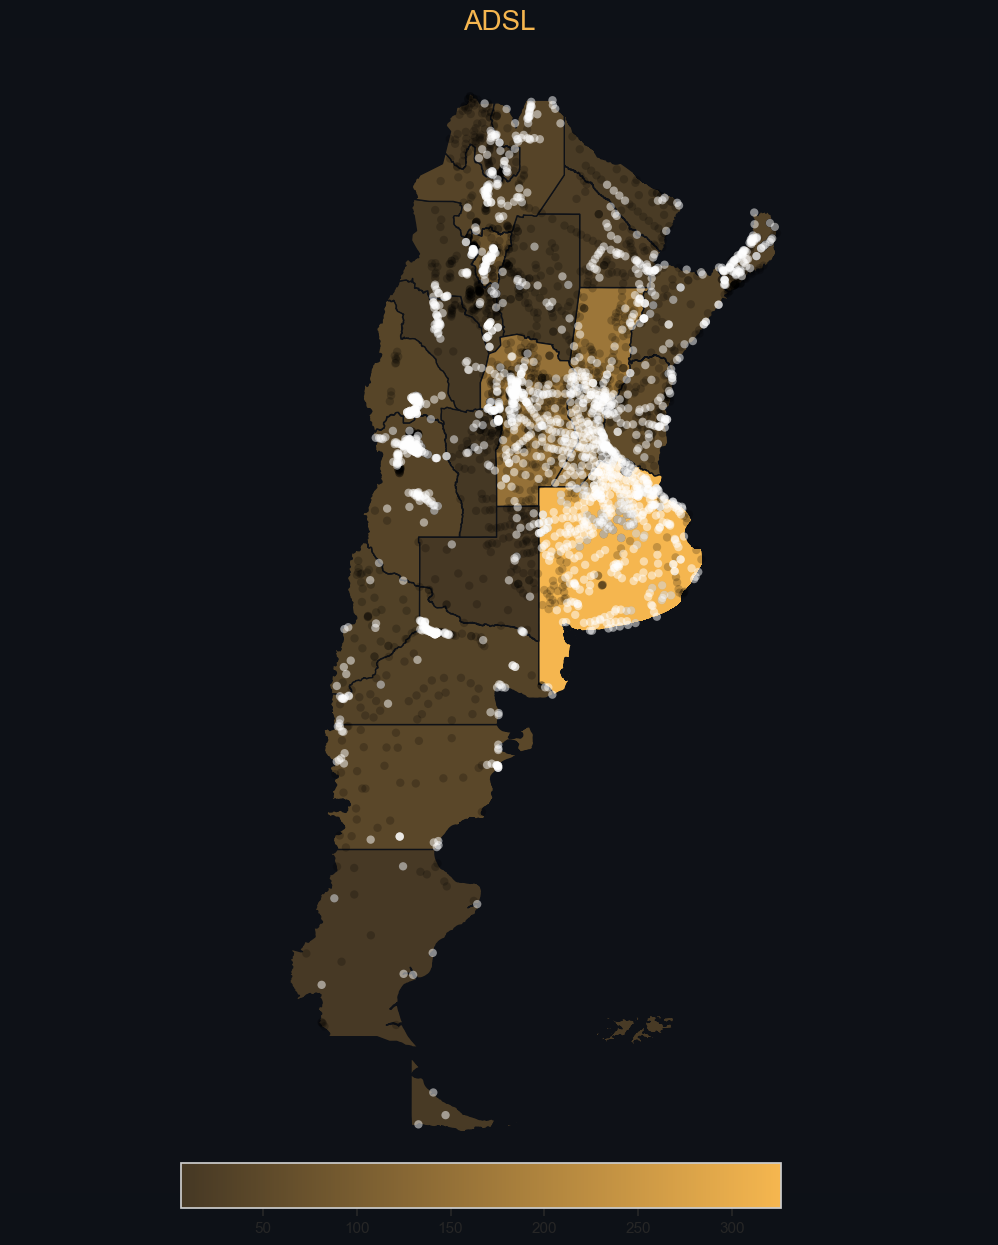

,gid,cod_pcia,nom_pcia,cod_depto,nom_depto,cod_ase,fna,tipo_asent,cod_aglo,nom_aglo,cod_agl,Localidad,lat_gd,long_gd,lat_gs,long_gs,fdc,geometry,ADSL
0,2555,06,Buenos Aires,06833,Tres Arroyos,06833070,Reta,Localidad simple,2086,Reta,060833,Tres Arroyos,-38.894894,-60.344858,"-38º53'42""","-60º20'41""",INDEC,MULTIPOINT ((-60.34486 -38.89489)),True
1,2549,06,Buenos Aires,06833,Tres Arroyos,06833010,Balneario Orense,Localidad simple,5046,Balneario Orense,060833,Tres Arroyos,-38.807443,-59.737482,"-38º48'27""","-59º44'15""",INDEC,MULTIPOINT ((-59.73748 -38.80744)),True
2,2550,06,Buenos Aires,06833,Tres Arroyos,06833020,Claromecó,Localidad simple,1159,Claromecó,060833,Tres Arroyos,-38.857475,-60.072800,"-38º51'27""","-60º 4'22""",INDEC,MULTIPOINT ((-60.07280 -38.85748)),True
3,2551,06,Buenos Aires,06833,Tres Arroyos,06833030,Copetonas,Localidad simple,1071,Copetonas,060833,Tres Arroyos,-38.721441,-60.451744,"-38º43'17""","-60º27' 6""",INDEC,MULTIPOINT ((-60.45174 -38.72144)),True
4,2552,06,Buenos Aires,06833,Tres Arroyos,06833040,Lin Calel,Localidad simple,8023,Lin Calel,060833,Tres Arroyos,-38.705621,-60.245021,"-38º42'20""","-60º14'42""",INDEC,MULTIPOINT ((-60.24502 -38.70562)),True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4464,14564,90,Tucumán,90119,Yerba Buena,90119010,Barrio San José III,Componente de localidad compuesta,0006,Gran San Miguel de Tucumán,908644,Cevil Redondo,-26.796460,-65.264600,"-26º47'47""","-65º15'53""",INDEC,MULTIPOINT ((-65.26460 -26.79646)),False
4465,14569,94,Tierra del Fuego,94007,Río Grande,94007010,Río Grande,Localidad simple,0072,Río Grande,940007,Río Grande,-53.786326,-67.696328,"-53º47'11""","-67º41'47""",INDEC,MULTIPOINT ((-67.69633 -53.78633)),False
4466,14569,94,Tierra del Fuego,94007,Río Grande,94007010,Río Grande,Localidad simple,0072,Río Grande,940007,Río Grande,-53.786326,-67.696328,"-53º47'11""","-67º41'47""",INDEC,MULTIPOINT ((-67.69633 -53.78633)),True
4467,14580,94,Tierra del Fuego,94007,Río Grande,94007020,Tolhuin,Localidad simple,4401,Tolhuin,942007,Tolhuin,-54.511439,-67.195172,"-54º30'41""","-67º11'43""",INDEC,MULTIPOINT ((-67.19517 -54.51144)),True


In [216]:
# 
def map_connectivity(prov_data, loc_data, technology, max_color, min_color):

    prov_data = prov_data[(prov_data["Año"] == 2022) & (prov_data["Trimestre"] == 4)]
    prov_data = sig_provincias.merge(prov_data[["Provincia", technology]], on="Provincia")

    loc_data = sig_localidades.merge(loc_data[["Localidad", technology]])

    con_data = loc_data[loc_data[technology] == True]
    des_data = loc_data[loc_data[technology] == False]

    cmap = LinearSegmentedColormap.from_list('custom_colormap', [max_color, min_color], N=256)
    vmin = prov_data[technology].min()
    vmax = prov_data[technology].max()

    fig, ax = plt.subplots(figsize=(15, 15))

    prov_data.plot(column=technology, legend=False, ax=ax, edgecolor='#0E1117', linewidth=1, cmap=cmap, vmin=vmin, vmax=vmax)
    
    des_data.plot(ax=ax, color="black", edgecolor="none", alpha=0.2)
    con_data.plot(ax=ax, color="white", edgecolor="none", alpha=0.5)
    

    plt.gcf().set_facecolor("#0D1117") # Background
    plt.gca().set_facecolor("#0D1117") # Background

    # Title configuration
    plt.title(f"{technology}", fontsize=20, color=min_color, loc='center')

    # Map configuration
    ax.set_xlim([-85, -45])
    ax.set_ylim([-57, -20])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_facecolor('#0E1117')

    # References configuration
    cax = plt.axes([0.3, 0.1, 0.4, 0.03])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')

    plt.show()
    
    return loc_data


map_connectivity(accesos_prov_por_tecnologia, localidades_con_conectividad, "ADSL", '#453824', '#F5B64F')

In [197]:
localidades_con_conectividad

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),True,False,False,--,False,False,False,False,--
1,BUENOS AIRES,9 de Julio,Carlos María Naón,False,False,False,--,False,False,False,False,--
2,BUENOS AIRES,9 de Julio,Dudignac,False,False,True,--,False,False,False,False,--
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),False,False,False,--,False,False,False,False,--
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),True,False,False,SI,False,False,False,False,--
...,...,...,...,...,...,...,...,...,...,...,...,...
4306,BUENOS AIRES,Pilar,Pilar,True,True,True,SI,False,False,False,False,SI
4307,BUENOS AIRES,Pilar,Presidente Derqui,True,True,False,SI,False,False,False,False,--
4308,BUENOS AIRES,Pilar,Roberto De Vicenzo,False,False,False,--,False,False,False,False,--
4309,BUENOS AIRES,Pilar,Santa Teresa,False,False,False,--,False,False,False,False,SI


In [184]:
accesos_loc_por_velocidad

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,61 Mbps,62 Mbps,64 Mbps,65 Mbps,66 Mbps,70 Mbps,75 Mbps,78 Mbps,80 Mbps,83 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3091,TUCUMAN,Trancas,San Pedro de Colalao,90112020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3092,TUCUMAN,Trancas,Villa de Trancas,90112030,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3093,TUCUMAN,Yerba Buena,Villa Carmela,90119020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Exportar
velocidad_por_año.to_csv("data/velocidad_nac_por_año.csv")
accesos_por_tecnologia.to_csv("data/accesos_nac_por_tecnologia.csv")
accesos_por_velocidad.to_csv("data/accesos_nac_por_velocidad.csv")
ingresos.to_csv("data/ingresos_nac.csv")
penetracion.to_csv("data/penetracion_nac.csv")
accesos_prov_por_tecnologia.to_csv("data/accesos_prov_por_tecnologia.csv")
accesos_prov_por_velocidad.to_csv("data/accesos_prov_por_velocidad.csv")
banda_ancha_fija_prov.to_csv("data/banda_ancha_fija_prov.csv")
penetracion_prov.to_csv("data/penetracion_prov.csv")